In [3]:
import skfmm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm

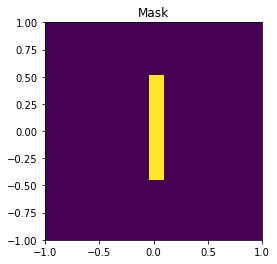

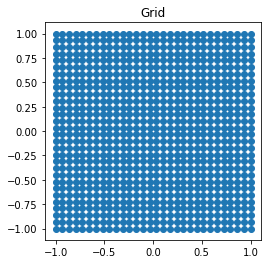

In [82]:
n=30
X, Y = np.meshgrid(np.linspace(-1,1,n), np.linspace(-1,1,n))

mask = np.logical_and(abs(X) < 0.1, abs(Y) < 0.5)


fig, ax = plt.subplots()
ax.set_title('Mask')
ax.pcolor(X, Y, mask)
plt.gca().set_aspect(1)
plt.show()

fig, ax = plt.subplots()
ax.scatter(X, Y)
ax.set_title('Grid')
plt.gca().set_aspect(1)
plt.show()

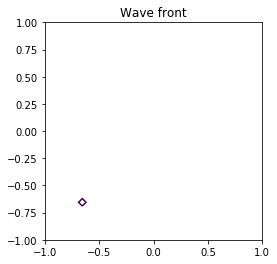

In [86]:
# Zero level of phi define wave front contour.
phi = -1 * np.ones_like(X)
phi[5, 5] = 1
phi  = np.ma.MaskedArray(phi, mask)

fig, ax = plt.subplots()
ax.contour(X, Y, phi, levels=[0.0])
ax.set_title('Wave front')
plt.gca().set_aspect(1)
plt.show()

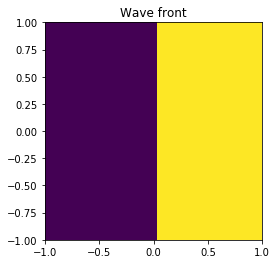

In [80]:
# Scalar field V, defines the speed in normal direction of the propagating wave front.
V = np.ones_like(X)
V[X>0.0] = 2.0
fig, ax = plt.subplots()
ax.pcolor(X, Y, V*200)
ax.set_title('Wave front')
plt.gca().set_aspect(1)
plt.show()

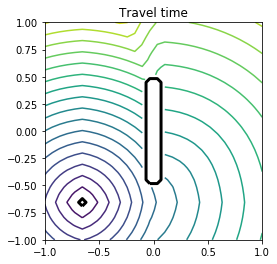

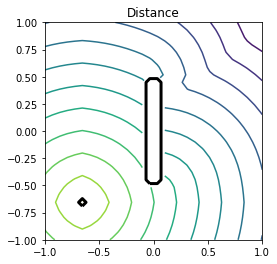

In [85]:
# Calculate distance and travel time for each point.
d = skfmm.distance(phi, dx=2.0/n)
T = skfmm.travel_time(phi, V, dx=2.0/n)

fig, ax = plt.subplots()
#CS = ax.contour(X, Y, phi)
ax.contour(X, Y, T, 15)
ax.contour(X, Y, phi, levels=[0], colors='black', linewidths=(3))
ax.contour(X, Y, phi.mask, levels=[0.5], colors='black', linewidths=(3))
ax.set_title('Travel time')
plt.gca().set_aspect(1)
plt.show()

fig, ax = plt.subplots()
ax.contour(X, Y, d, 15)
ax.contour(X, Y, phi, levels=[0], colors='black', linewidths=(3))
ax.contour(X, Y, phi.mask, levels=[0.5], colors='black', linewidths=(3))
ax.set_title('Distance')
plt.gca().set_aspect(1)
plt.show()